In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(font_scale=1.5)

**************************************************

Presenteeism param sweep -- parcel wp

**************************************************

In [3]:
df1 = pd.read_pickle("presenteeism_param_sweep.pkl",compression='bz2')
df1['NRecovered'] = df1['FracRecovered']*df1['NStaff']

In [4]:
PIsol = np.unique(df1["Pisol"])
PFC = np.unique(df1["p_friend_contact"])
II = np.unique(df1["InfInit"])
#parameter reminder
print('Phi = ', np.unique(df1['phi']))
print('Driver contact rate = ', np.unique(df1['tD']))
print('Random contact rate = ', np.unique(df1['p_contact']))
print('Staff totals = ', np.unique(df1['NStaff']))
job = ['Driver','Picker','Office']

Phi =  [0.05]
Driver contact rate =  [0.25]
Random contact rate =  [0.02941176]
Staff totals =  [10 20 38 68]


In [5]:
dfall = df1[df1["Group"]=='All']
dfall['outbreak'] = (dfall['NRecovered'] > 4)
dfall['Ninfected'] = (dfall.loc[:,'FracRecovered']*dfall.loc[:,'NStaff'] - 1)
dfall['InfJob'] = np.ones(len(dfall),dtype=np.object)
for i in np.arange(3):
    dfall.loc[dfall['InfInit']==i+1,'InfJob'] = job[i]


/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/carlwhitfield/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

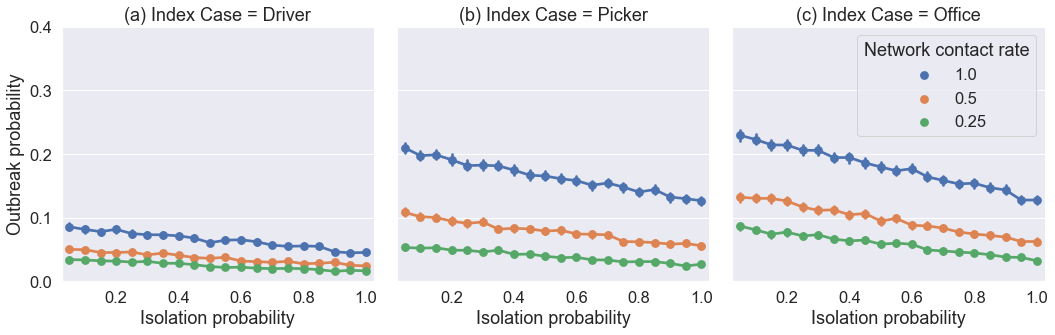

In [9]:
sns.set_color_codes()

sp = sns.catplot(x="Pisol", y="outbreak", col="InfInit", hue="p_friend_contact",\
                   hue_order=[PFC[2],PFC[1],PFC[0]],data=dfall, kind="point",legend=False)
sp.set(ylim=(0,0.4),xlabel='Isolation probability')
axes = sp.axes.flatten()
axes[0].set_ylabel('Outbreak probability')
lab = ['a','b','c']
for i in range(3):
    axes[i].set_title('(%s) Index Case = %s'%(lab[i],job[i]))
xticklabs = np.array(PIsol,dtype=np.object)

xticklabs[(np.arange(len(PIsol)) - 3)%4 != 0] = None

sp.set_xticklabels(xticklabs)
plt.legend(loc='upper right',title='Network contact rate')

plt.tight_layout()
sp.savefig('Outbreak_prob_presenteeism.png')

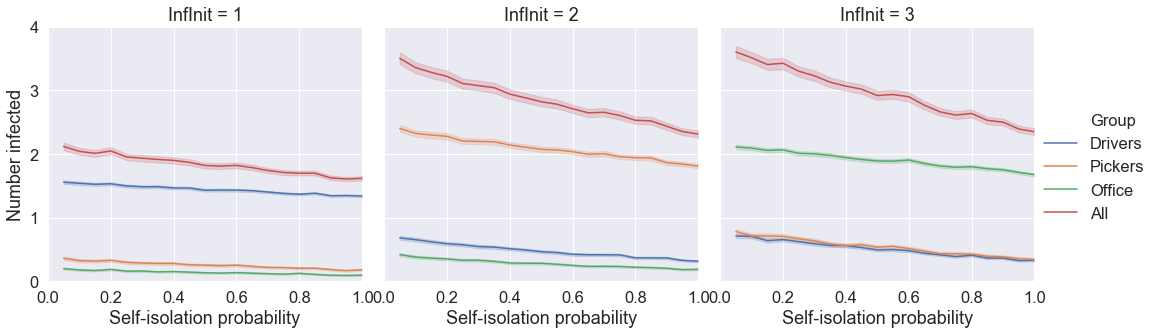

In [7]:
figh = sns.relplot(x="Pisol", y="NRecovered", col="InfInit",hue="Group",\
                   data=df1.loc[lambda df1: (df1['p_friend_contact'] == 1.0)], kind="line")
figh.set(xlabel='Self-isolation probability',ylabel='Number infected', xlim=(0,1), ylim=(0,4))
figh.savefig("network_workplace_presenteeism_outbreak_size.png")

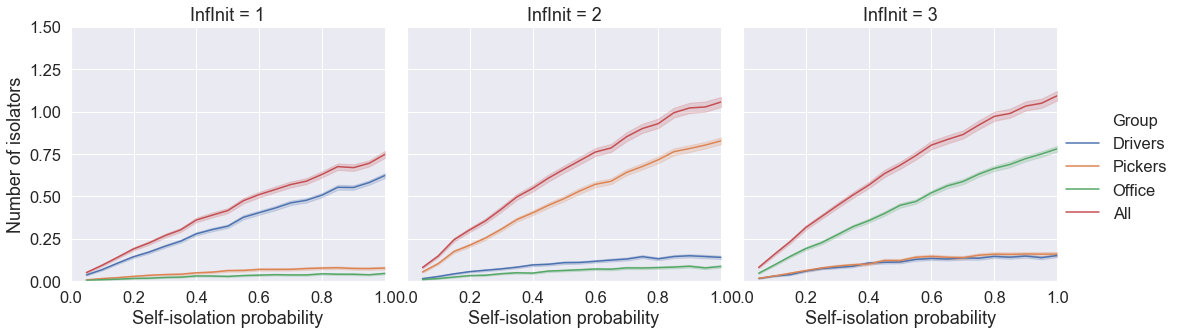

In [8]:
df1['IsolatorsNum'] = df1['IsolatorsFrac']*df1['NStaff']
figh = sns.relplot(x="Pisol", y="IsolatorsNum", col="InfInit",hue="Group",\
                   data=df1.loc[lambda df1: (df1['p_friend_contact'] == 1.0)], kind="line")
figh.set(xlabel='Self-isolation probability',ylabel='Number of isolators', xlim=(0,1), ylim=(0,1.5))
figh.savefig("tot_isolators_presenteeism_parcel.png")